Es 2 diviso in due parti:
- library,precision,k,policy,iteration,time,GFLOPS 
- library,precision,n_threads,iteration,time,GFLOPS

ogni iteration righe facciamo media
library : 'mkl' 'blis' 'oblas'
precision: 'f' 'd'
policy :'false' 'close' 'spread'

In [ ]:
# create a toy dataset in csv for testing

# these are the columns, separated by comma
# library,precision,k,policy,iteration,time,GFLOPS 
# where library : 'mkl' 'blis' 'oblas', precision: 'f' 'd', policy :'false' 'close' 'spread'
# k is an integer (es first 50 rows has k=100, second 50 rows has k=200)
# iteration is integer from 1 to 5 (every 5 lines it return to 1)
# time and GFLOPS are float

# nnote that every 5 rows, the iteration is reset to 1 and fo that 5, library, recision and policy are fixed

In [ ]:
import numpy as np
import pandas as pd

# read csv
df = pd.read_csv('data.csv')
print(df)
# get the columns



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DataWrangling:
    def __init__(self, file):
        self.file = file
        self.df = pd.read_csv(file)
        self.columns = list(self.get_columns())

    def get_columns(self):
        return self.df.columns
    
    def get_levels(self, col):
        return self.df[col].unique()
    
    def get_data_by_level(self, col, level):
        if level not in self.get_levels(col):
            print('Error: level not in the column')
            return None
        else:
            return self.df[self.df[col] == level]
        
    def remove_columns(self, col_to_remove):
        self.df = self.df.drop(columns=col_to_remove)
        self.columns = list(self.get_columns())
        
    def get_time_by_level(self, col, level):
        if level not in self.get_levels(col):
            print('Error: level not in the column')
            return None
        else:
            return self.get_data_by_level(col, level)['time']
    
    def get_gflops_by_level(self, col, level):
        if level not in self.get_levels(col):
            print('Error: level not in the column')
            return None
        else:
            return self.get_data_by_level(col, level)['GFLOPS']
        
    
    def get_averaged_data(self, col_to_average):
        columns = self.columns.copy()
        for col in col_to_average:
            if col not in columns:
                print('Error: column not in the dataframe')
                return None
            columns.remove(col)

  
        averaged_df = self.df.groupby(columns, as_index=False).agg({
            col_to_average[0]: 'mean',
            col_to_average[1]: 'mean'
        })

        return averaged_df
    
    def switch_to_averaged_data(self, col_to_average):
        columns = self.columns.copy()
        for col in col_to_average:
            if col not in columns:
                print('Error: column not in the dataframe')
                return None
            columns.remove(col)
        
  
        averaged_df = self.df.groupby(columns, as_index=False).agg({
            col_to_average[0]: 'mean',
            col_to_average[1]: 'mean'
        })

        self.df = averaged_df
        self.columns = list(self.get_columns())


    def plot_y_vs_x_by_cat(self, y, x, cat):
        if cat not in self.columns:
            print('Error: category not in the dataframe')
            return None
        
        sns.set_theme(style="whitegrid")
        # x is numeric, y is numeric, cat is categorical
        # i want a line plot with multiple lines (one per level of cat)
        # x is the x axis, y is the y axis, cat is the hue

        # get the levels of cat
        levels = self.get_levels(cat)
        # for each level, get the data
        for level in levels:
            data = self.get_data_by_level(cat, level)
            print(data)
            plt.plot(data[x], data[y], label=level)

        plt.legend()
        plt.show()
            


        


def get_averaged_data(self):
        # Group by relevant columns and calculate mean for 'time' and 'GFLOPS'
        averaged_df = self.df.groupby(['library', 'precision', 'k', 'policy'], as_index=False).agg({
            'time': 'mean',
            'GFLOPS': 'mean'
        })
        
        return averaged_df

In [22]:
data = DataWrangling('data.csv')
data.remove_columns('iteration') # important to properly fare la media

In [23]:
data.df

,library,precision,k,policy,time,GFLOPS
0,mkl,f,100,false,0.25,150.2
1,mkl,f,100,false,0.28,140.5
2,mkl,f,100,false,0.24,155.0
3,mkl,f,100,false,0.26,148.7
4,mkl,f,100,false,0.27,145.3
...,...,...,...,...,...,...
175,oblas,d,200,spread,0.35,112.6
176,oblas,d,200,spread,0.33,115.2
177,oblas,d,200,spread,0.36,105.7
178,oblas,d,200,spread,0.31,120.4


In [24]:
col_to_average = ['time', 'GFLOPS']
data.switch_to_averaged_data(col_to_average)

In [25]:
data.df

,library,precision,k,policy,time,GFLOPS
0,blis,d,100,close,0.230,172.46
1,blis,d,100,false,0.230,172.46
2,blis,d,100,spread,0.230,172.46
3,blis,d,200,close,0.338,112.84
4,blis,d,200,false,0.338,112.84
5,blis,d,200,spread,0.338,112.84
6,blis,f,100,close,0.260,147.94
7,blis,f,100,false,0.260,147.94
8,blis,f,100,spread,0.260,147.94
9,blis,f,200,close,0.392,98.02


   library precision    k policy   time  GFLOPS
0     blis         d  100  close  0.230  172.46
3     blis         d  200  close  0.338  112.84
6     blis         f  100  close  0.260  147.94
9     blis         f  200  close  0.392   98.02
12     mkl         d  100  close  0.230  172.46
15     mkl         d  200  close  0.338  112.84
18     mkl         f  100  close  0.260  147.94
21     mkl         f  200  close  0.392   98.02
24   oblas         d  100  close  0.230  172.46
27   oblas         d  200  close  0.338  112.84
30   oblas         f  100  close  0.260  147.94
33   oblas         f  200  close  0.392   98.02
   library precision    k policy   time  GFLOPS
1     blis         d  100  false  0.230  172.46
4     blis         d  200  false  0.338  112.84
7     blis         f  100  false  0.260  147.94
10    blis         f  200  false  0.392   98.02
13     mkl         d  100  false  0.230  172.46
16     mkl         d  200  false  0.338  112.84
19     mkl         f  100  false  0.260 

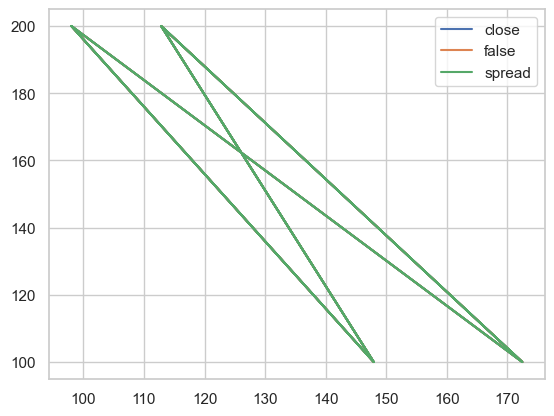

In [26]:
data.plot_y_vs_x_by_cat('k', 'GFLOPS', 'policy')